In [1]:
# Import packages
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
#import math
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from pandas import concat
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

In [2]:
import datetime
from datetime import datetime
from datetime import timedelta

In [3]:
#used as temporary solution - if there's time must fill missing values in a more meaningful way
df = pd.read_csv('data.csv').fillna(method='ffill')
#df.head(15)
df.drop_duplicates(keep=False,inplace=True) 

In [4]:
def parse_date2(date):
    if date.endswith(",1"):
        date += "0"
    return datetime.strptime(date, "%Y,%m")

In [5]:
# dropping Fractions column as the initial research shown it is not adding much value
# e.g. https://datahub.io/core/s-and-p-500
df.drop("Fraction", axis=1, inplace=True)

In [6]:
df['Date'] = df['Date'].apply(parse_date2)

In [7]:
df.head(25)

,Date,P,D,E,CPI,GS10,Price,Dividend,Earnings
0,1871-01-01,"4,44","0,26","0,40","12,46","5,32","91,37","5,35","8,23"
1,1871-02-01,"4,50","0,26","0,40","12,84","5,32","89,86","5,19","7,99"
2,1871-03-01,"4,61","0,26","0,40","13,03","5,33","90,71","5,12","7,87"
3,1871-04-01,"4,74","0,26","0,40","12,56","5,33","96,81","5,31","8,17"
4,1871-05-01,"4,86","0,26","0,40","12,27","5,33","101,57","5,43","8,36"
5,1871-06-01,"4,82","0,26","0,40","12,08","5,34","102,32","5,52","8,49"
6,1871-07-01,"4,73","0,26","0,40","12,08","5,34","100,41","5,52","8,49"
7,1871-08-01,"4,79","0,26","0,40","11,89","5,34","103,31","5,61","8,63"
8,1871-09-01,"4,84","0,26","0,40","12,18","5,35","101,94","5,48","8,42"
9,1871-10-01,"4,59","0,26","0,40","12,37","5,35","95,19","5,39","8,30"


In [8]:
# those are dtype (str) type of objects and need to be converted
df['P'].apply(type).value_counts()

<class 'str'>    1783
Name: P, dtype: int64

In [9]:
# defining auxiliary cleaning function
def clean_column(x):
    """ the values are str objects containing ',' those have been replaced with '.'
    """
    if isinstance(x, str):
        return(x.replace(',', '.'))
    return(x)

In [10]:
#df['P'] = df['P'].apply(clean_column).astype('float')
cols = df.columns[df.dtypes.eq('object')]
cols

Index(['P', 'D', 'E', 'CPI', 'GS10', 'Price', 'Dividend', 'Earnings'], dtype='object')

In [11]:
#selecting all 'object' type of columns in one shot
# there might be even shorter way - skipping for loop - investigate later if time permits
cols = df.columns[df.dtypes.eq('object')]

for column in cols:
    df[column] = df[column].apply(clean_column).astype('float')

In [12]:
# save to file to have a copy
df.to_csv('fotmatted_series.csv')

### Adding new features: 
we should normalize tha data and draw autocorrelation log returns and lagged log returns and lagged volatilities while looking up for patterns.
Log returns are considered a standard transforamtional practice

In [13]:

df['pct_change'] = df['Price'].pct_change().fillna(method='bfill')
df['log_ret_1_mth'] = np.log(df['P'] / df['P'].shift(1)).fillna(method='bfill')

df['Log_Ret_2_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=2).sum()
df['Log_Ret_3_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=3).sum()
df['Log_Ret_4_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=4).sum()
df['Log_Ret_8_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=8).sum()
df['Log_Ret_12_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=12).sum()
df['Log_Ret_48_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=48).sum()


In [14]:
df['volat_2_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=2).std()*np.sqrt(2)
df['volat_3_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=3).std()*np.sqrt(3)
df['volat_4_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=4).std()*np.sqrt(4)
df['volat_8_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=8).std()*np.sqrt(8)
df['volat_12_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=12).std()*np.sqrt(12)
df['volat_48_mth']=pd.Series(df['log_ret_1_mth']).rolling(window=48).std()*np.sqrt(48)


In [15]:
df.head()

,Date,P,D,E,CPI,GS10,Price,Dividend,Earnings,pct_change,...,Log_Ret_4_mth,Log_Ret_8_mth,Log_Ret_12_mth,Log_Ret_48_mth,volat_2_mth,volat_3_mth,volat_4_mth,volat_8_mth,volat_12_mth,volat_48_mth
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,91.37,5.35,8.23,-0.016526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,89.86,5.19,7.99,-0.016526,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,90.71,5.12,7.87,0.009459,...,NaN,NaN,NaN,NaN,0.010727,0.010727,NaN,NaN,NaN,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,96.81,5.31,8.17,0.067247,...,0.078806,NaN,NaN,NaN,0.003659,0.012950,0.014804,NaN,NaN,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,101.57,5.43,8.36,0.049168,...,0.090384,NaN,NaN,NaN,0.002808,0.003316,0.012624,NaN,NaN,NaN


### CAPE ratio engineering
Also, this dataset was created as a part of larger study by Robert J. Shiller, [2]  who invented a precitvive index called CAPE (Cyclically adjusted price-to-earnings ratio)  which is said have a good predictive characteristics. 
Let's try to engineer it from the data we have

In [16]:
#RECONSIDER - we have those already - 
# to catch for so-called trends (moving averages) let's engineer rolling mean 
df['rolling_Earnings_mean12'] = df['Earnings'].rolling(window=12).mean()
df['rolling_Earnings_mean120'] = df['Earnings'].rolling(window=120).mean()
df['CAPE10'] = (df['Price']/df['rolling_Earnings_mean120'])

In [17]:
# Label data: Up (Down) if the the 1 month logarithmic return increased (decreased)
# shift index axis by a period in negative direction 
 
df['dir']=np.where(df['log_ret_1_mth'] > 0, 1, 0)

In [18]:
# backfilling with same values, CAPE, volatilities, rolling earning means 
# should not impact much since those are NaN's primarily in 1870's
df = df.iloc[:].fillna(method='bfill')

In [19]:
# making sure we don't have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1783 non-null   datetime64[ns]
 1   P                         1783 non-null   float64       
 2   D                         1783 non-null   float64       
 3   E                         1783 non-null   float64       
 4   CPI                       1783 non-null   float64       
 5   GS10                      1783 non-null   float64       
 6   Price                     1783 non-null   float64       
 7   Dividend                  1783 non-null   float64       
 8   Earnings                  1783 non-null   float64       
 9   pct_change                1783 non-null   float64       
 10  log_ret_1_mth             1783 non-null   float64       
 11  Log_Ret_2_mth             1783 non-null   float64       
 12  Log_Ret_3_mth       

#### Hidden Markov Model (HMM) example applied

Volatility clustering is also known as market regimes switches.
HMM implies that there exist "hidden" states which have impacts on observable values.

If we assume that the observations are the returns from a particular stock from market it would be implied that the returns are indirectly influenced by the hidden market regimes. Fitting HMM to the returns data allows prediction of new regime states. This could be very beneficial for forecasting and risk management.


Markov Models can be split into four broad classes of models depending upon the autonomy of the system and whether all or part of the information about the system can be observed at each state
A Markov Model is a stochastic state space model involving random transitions between states where the probability of the jump is only dependent upon the current state, rather than any of the previous states. The model is said to possess the Markov Property and is "memoryless". Random Walk models are another familiar example of a Markov Mode. More on categories and the model itself is in [1]. Model was adapted from [2]

In [20]:
# regime_hmm_train.py
# prerequisite: pip install hmmlearn
from __future__ import print_function

import datetime
import pickle
import warnings

from hmmlearn.hmm import GaussianHMM
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
def plot_in_sample_hidden_states(hmm_model, df):
    """
    Plot the adjusted closing prices masked by 
    the in-sample hidden states as a mechanism
    to understand the market regimes.
    """
    # Predict the hidden states array
    hidden_states = hmm_model.predict(rets)
    # Create the correctly formatted plot
    fig, axs = plt.subplots(
        hmm_model.n_components, 
        sharex=True, sharey=True
    )
    colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        ax.plot_date(
            df.index[mask], 
            df["Price"][mask], 
            ".", linestyle='none', 
            c=colour
        )
        ax.set_title("Hidden State #%s" % i)
        ax.xaxis.set_major_locator(YearLocator())
        ax.xaxis.set_minor_locator(MonthLocator())
        ax.grid(True)
    plt.show()

In [22]:
# unsetting index so that we could feed it to plot_in_sample_hidden_states() method
# before was getting RuntimeError: Locator attempting to generate 1961 ticks from 680294.0 to 739951.0: exceeds Locator.MAXTICKS
df_hmm = df.copy()

#df_hmm.reset_index(inplace = True) 
df_hmm.head()

,Date,P,D,E,CPI,GS10,Price,Dividend,Earnings,pct_change,...,volat_2_mth,volat_3_mth,volat_4_mth,volat_8_mth,volat_12_mth,volat_48_mth,rolling_Earnings_mean12,rolling_Earnings_mean120,CAPE10,dir
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,91.37,5.35,8.23,-0.016526,...,0.000000,0.010727,0.014804,0.046937,0.080224,0.203138,8.28,9.1245,17.254644,1
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,89.86,5.19,7.99,-0.016526,...,0.000000,0.010727,0.014804,0.046937,0.080224,0.203138,8.28,9.1245,17.254644,1
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,90.71,5.12,7.87,0.009459,...,0.010727,0.010727,0.014804,0.046937,0.080224,0.203138,8.28,9.1245,17.254644,1
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,96.81,5.31,8.17,0.067247,...,0.003659,0.012950,0.014804,0.046937,0.080224,0.203138,8.28,9.1245,17.254644,1
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,101.57,5.43,8.36,0.049168,...,0.002808,0.003316,0.012624,0.046937,0.080224,0.203138,8.28,9.1245,17.254644,1


In [23]:
df_hmm['pct_change']

0      -0.016526
1      -0.016526
2       0.009459
3       0.067247
4       0.049168
          ...   
1778    0.012120
1779    0.030145
1780   -0.018994
1781    0.011346
1782    0.029135
Name: pct_change, Length: 1783, dtype: float64

In [24]:
rets = np.column_stack([df_hmm['pct_change']])

In [25]:
# Create the Gaussian Hidden markov Model and fit it
# to the stock's log returns data, outputting a score
hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000).fit(rets)
print("Model Score:", hmm_model.score(rets))

Model Score: 3406.555103466794



Model Score represents log-likelihood of sequences under the model. Details on score interpretation could be taken from   

(PDF) Scoring hidden Markov models. Available from: https://www.researchgate.net/publication/14071457_Scoring_hidden_Markov_models [accessed Jun 07 2020].

The log-odds  score  asserts  whether  or  not  the  probability  that  the sequence   was  generated  by  the  model  m  is  larger  than  the probability  that  the sequence was generated  by the null  model. Need to spend some more time here to understand the null and alternative hypothesis, etc.

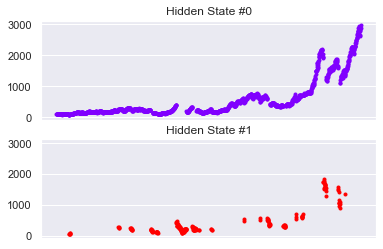

In [26]:

  
# Plot the in sample hidden states closing values
plot_in_sample_hidden_states(hmm_model, df)

### Future work

GARCH models are known to be based on HMM and are worth trying. GARCH models [3] were among the first models to take into account the volatility clustering phenomenon into account.
Among other volatility clustering recognition techniques Holt Winters could be mentioned. Another notable mention is Symbolic Aggregate Approximation (SAX) [4].

Recently RNN state-of-the-art methods (e.g. like LSTM) were used to obtain promising results mainly due to their property to  presere and train the features  of  given  data for  larger timeframes.

On a separate note. Neither seem to provide any economic explanation for volatility clustering. Several researchers have studied the topic. For example behavioral switching, role of investor inertia mentioned by Cont [5]. The fundamental studies in the domain of behavioral finance Lo, Andrew W [6, 7] are also worth mentioning

### References

[1] _Markov model_ , weblink: https://en.wikipedia.org/wiki/Markov_model

[2] _Market Regime Detection using Hidden Markov Models in QSTrader_ , weblink: https://www.quantstart.com/articles/market-regime-detection-using-hidden-markov-models-in-qstrader/

[3] T. Bollerslev, R. Chou, and K. Kroner, ARCH modeling in finance, Journal of
Econometrics, 52 (1992), pp. 5–59

[4] Symbolic Aggregate Approximation, weblink: https://jmotif.github.io/sax-vsm_site/morea/algorithm/SAX.html

[5] R. Cont _Volatility Clustering in Financial Markets:
Empirical Facts and Agent–Based Models_  , Centre de Math´ematiques appliqu´ees, Ecole Polytechnique
F-91128 Palaiseau, France. weblink: http://www.cmap.polytechnique.fr/~rama/papers/clustering.pdf

[6] Lo, Andrew W, Adaptive Markets: _Financial Evolution at the Speed of Thought_, 2017

[7] Lo, Andrew W., Reconciling Efficient Markets with Behavioral Finance: The Adaptive Markets Hypothesis (2005). Journal of Investment Consulting, Vol. 7, No. 2, pp. 21-44, 2005. Available at SSRN: https://ssrn.com/abstract=1702447